In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.cluster.hierarchy as sch
import statistics
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm
from scipy.stats.mstats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [ ]:
initial_data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
columns_red = initial_data_red.columns[:-1]
YG_data_red = initial_data_red[['volatile acidity', 'chlorides',  'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']].copy()
# initial_data_red = initial_data_red[['volatile acidity', 'density', 'citric acid', 'pH', 'sulphates', 'alcohol', 'quality']].copy()


In [ ]:
initial_data_red.shape

(4898, 12)

Correlation matrix =>


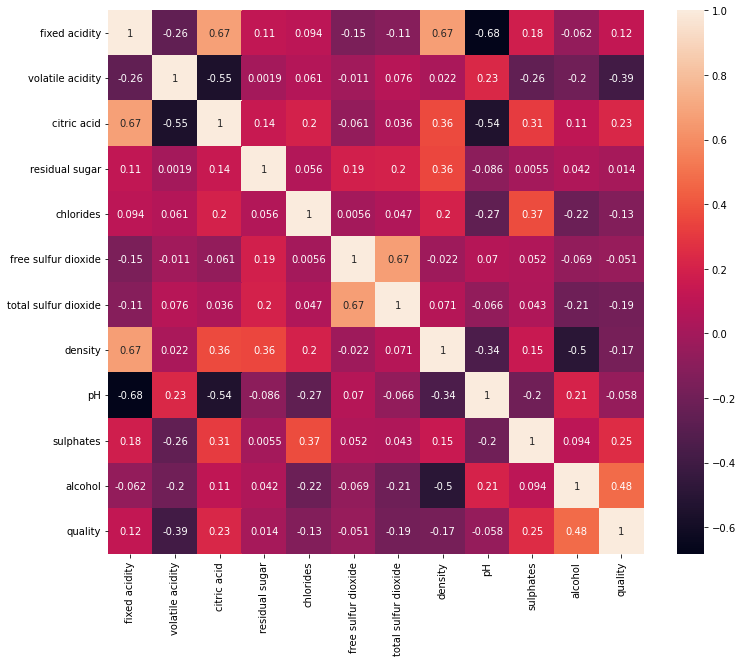

In [ ]:
# Correlation Matix
print("Correlation matrix =>")
plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(initial_data_red).corr(), annot=True)

In [ ]:
# extract target
quality_red = initial_data_red['quality']
initial_data_red.drop('quality', axis=1, inplace=True)


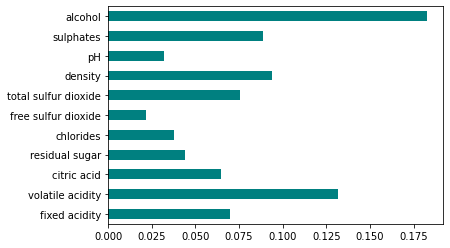

In [ ]:
# feature importance compared to type
importance = mutual_info_classif(initial_data_red,quality_red)
feat_importance = pd.Series(importance, columns_red)
feat_importance.plot(kind='barh', color = 'teal')
plt.show()

In [ ]:
YG_data_red.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4


In [ ]:
scaler = StandardScaler()
initial_data_red = pd.DataFrame( scaler.fit_transform(initial_data_red),columns=initial_data_red.columns)
YG_data_red = pd.DataFrame( scaler.fit_transform(YG_data_red),columns=YG_data_red.columns)

In [ ]:
# print sm report
print(sm.OLS(zscore(quality_red), zscore(initial_data_red)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.361
Model:                            OLS   Adj. R-squared (uncentered):              0.356
Method:                 Least Squares   F-statistic:                              81.40
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                   1.44e-145
Time:                        17:04:20   Log-Likelihood:                         -1911.4
No. Observations:                1599   AIC:                                      3845.
Df Residuals:                    1588   BIC:                                      3904.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(initial_data_red, quality_red, test_size=0.3,random_state=100)

In [ ]:
x_train_YG, x_test_YG, y_train_YG, y_test_YG = train_test_split(YG_data_red, quality_red, test_size=0.3,random_state=100)


In [ ]:
pca = PCA().fit(x_train)

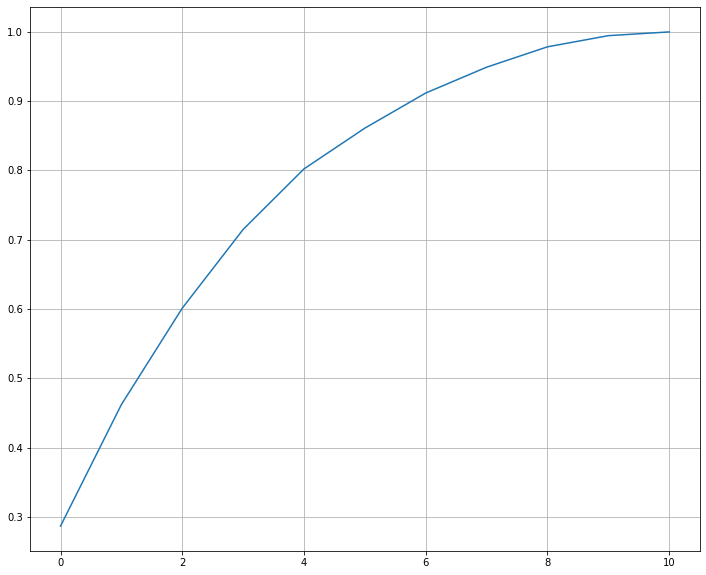

In [ ]:
plt.figure(figsize=(12,10))
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# ax1.plot(val_loss)
# plt.set_xlabel("NUmber of components")
# plt.set_ylabel("Variance")

In [ ]:
pca_new = PCA(n_components=6)
pca_new.fit(x_train)
x_train_pca = pca_new.transform(x_train)
x_test_pca = pca_new.transform(x_test)


In [ ]:
param_grid = {'C': [0.1, 0.5, 1, 5, 8, 10, 50, 100, 1000],
              'gamma': ['scale', 'auto'] ,
              'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
# YG
lin_svc_YG = SVC()
lin_svc_YG.fit(x_train_YG, y_train_YG)
y_pred_YG = lin_svc_YG.predict(x_test_YG)
print("Accuracy=> ",accuracy_score(y_test,y_pred_YG))
print("classification report=> ",classification_report(y_test, y_pred_YG))

Accuracy=>  0.6416666666666667
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.71      0.75      0.73       204
           6       0.58      0.69      0.63       193
           7       0.66      0.36      0.46        59
           8       0.00      0.00      0.00         4

    accuracy                           0.64       480
   macro avg       0.32      0.30      0.30       480
weighted avg       0.61      0.64      0.62       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# PCA
lin_svc_PCA = SVC()
lin_svc_PCA.fit(x_train_pca, y_train)
y_pred_pca = lin_svc_PCA.predict(x_test_pca)
print("Accuracy=> ",accuracy_score(y_test,y_pred_pca))
print("classification report=> ",classification_report(y_test,y_pred_pca))

Accuracy=>  0.5958333333333333
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.66      0.74      0.69       204
           6       0.54      0.63      0.58       193
           7       0.54      0.25      0.34        59
           8       0.00      0.00      0.00         4

    accuracy                           0.60       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.56      0.60      0.57       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# No red
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
y_pred = lin_svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print("Accuracy=> ",accuracy_score(y_test,y_pred))
print("classification report=> ",classification_report(y_test,y_pred))

0.6354166666666666
Accuracy=>  0.6354166666666666
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.69      0.77      0.73       204
           6       0.59      0.66      0.62       193
           7       0.54      0.36      0.43        59
           8       0.00      0.00      0.00         4

    accuracy                           0.64       480
   macro avg       0.30      0.30      0.30       480
weighted avg       0.60      0.64      0.61       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 40)),
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'l2', 'cosine']
             }

clf = GridSearchCV(knn, param_grid, cv = 10)



In [ ]:
# No reduction knn grid search
clf.fit(x_train, y_train)
clf.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


{'metric': 'cosine', 'n_neighbors': 36, 'weights': 'distance'}

In [ ]:
newKnn = KNeighborsClassifier(n_neighbors=36, weights='distance', metric='cosine')
newKnn.fit(x_train, y_train)
y_predTest = clf.predict(x_test)
print("Accuracy=> ",accuracy_score(y_test,y_predTest))
print("classification report=> ",classification_report(y_test,y_predTest))

Accuracy=>  0.6416666666666667
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.70      0.77      0.73       204
           6       0.61      0.61      0.61       193
           7       0.52      0.54      0.53        59
           8       0.00      0.00      0.00         4

    accuracy                           0.64       480
   macro avg       0.31      0.32      0.31       480
weighted avg       0.61      0.64      0.62       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# YG knn grid search
clf.fit(x_train_YG, y_train_YG)
clf.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


{'metric': 'l1', 'n_neighbors': 35, 'weights': 'distance'}

In [ ]:
newKnn = KNeighborsClassifier(n_neighbors=35, weights='distance', metric='l1')
newKnn.fit(x_train_YG, y_train)
y_predTest = clf.predict(x_test_YG)
accuracy_score(y_test, y_predTest)
print("Accuracy=> ",accuracy_score(y_test,y_predTest))
print("classification report=> ",classification_report(y_test,y_predTest))

Accuracy=>  0.6729166666666667
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.75      0.76      0.76       204
           6       0.62      0.70      0.66       193
           7       0.59      0.54      0.57        59
           8       0.00      0.00      0.00         4

    accuracy                           0.67       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.64      0.67      0.66       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# PCA knn grid search
clf.fit(x_train_pca, y_train)
clf.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


{'metric': 'l1', 'n_neighbors': 37, 'weights': 'distance'}

In [ ]:
newKnn = KNeighborsClassifier(n_neighbors=37, weights='distance', metric='l1')
newKnn.fit(x_train_pca, y_train)
y_predTest = clf.predict(x_test_pca)
print("Accuracy=> ",accuracy_score(y_test,y_predTest))
print("classification report=> ",classification_report(y_test,y_predTest))

Accuracy=>  0.6604166666666667
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.71      0.73      0.72       204
           6       0.61      0.70      0.66       193
           7       0.67      0.54      0.60        59
           8       0.00      0.00      0.00         4

    accuracy                           0.66       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.63      0.66      0.64       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']
}
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
# no reduction RF
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 75}

In [ ]:

rf = RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', n_estimators = 75)
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
print("Accuracy=> ",accuracy_score(y_test,rf_predict))
print("classification report=> ",classification_report(y_test,rf_predict))

Accuracy=>  0.6604166666666667
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.72      0.77      0.75       204
           6       0.62      0.66      0.64       193
           7       0.55      0.53      0.54        59
           8       0.00      0.00      0.00         4

    accuracy                           0.66       480
   macro avg       0.32      0.33      0.32       480
weighted avg       0.63      0.66      0.64       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# YG reduction RF
CV_rfc.fit(x_train_YG, y_train)
CV_rfc.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_features = 'log2', n_estimators = 200)
rf.fit(x_train_YG, y_train)
rf_predict=rf.predict(x_test_YG)
print("Accuracy=> ",accuracy_score(y_test,rf_predict))
print("classification report=> ",classification_report(y_test,rf_predict))

Accuracy=>  0.6770833333333334
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.74      0.79      0.76       204
           6       0.64      0.68      0.66       193
           7       0.57      0.54      0.56        59
           8       0.00      0.00      0.00         4

    accuracy                           0.68       480
   macro avg       0.33      0.34      0.33       480
weighted avg       0.64      0.68      0.66       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# pca reduction RF
CV_rfc.fit(x_train_pca, y_train)
CV_rfc.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 75}

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', max_features = 'log2', n_estimators = 75)
rf.fit(x_train_pca, y_train)
rf_predict=rf.predict(x_test_pca)
print("Accuracy=> ",accuracy_score(y_test,rf_predict))
print("classification report=> ",classification_report(y_test,rf_predict))

Accuracy=>  0.6729166666666667
classification report=>                precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.70      0.79      0.74       204
           6       0.64      0.67      0.66       193
           7       0.67      0.54      0.60        59
           8       0.00      0.00      0.00         4

    accuracy                           0.67       480
   macro avg       0.34      0.33      0.33       480
weighted avg       0.64      0.67      0.65       480



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#####################################################################################################################################################

In [ ]:
initial_data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
columnsWhite = initial_data_white.columns[:-1]
qualityWhite = initial_data_white['quality']
initial_data_white.drop('quality', axis=1, inplace=True)
